In [1]:
import numpy as np
import random as rn
import tensorflow as tf
from keras import backend as K
np.random.seed(42)
rn.seed(42)
session_conf=tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
tf.random.set_seed(42)

Using TensorFlow backend.


In [2]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D as Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
import pandas as pd
import numpy as np

In [3]:
# Importing test and train data
data_test=pd.read_csv('/home/cmu/AIML/Project/testx_150.csv',header=None).values
#data_train=pd.read_csv('/home/cmu/AIML/Project/trainx_150.csv',header=None).values

In [4]:
a_test,b_test=data_test.shape
#a_train,b_train=data_train.shape

In [5]:
data_test=data_test.reshape(a_test,150,150,1)
#data_train=data_train.reshape(a_train,150,150,1)

In [6]:
def model(input_shape):
    X_inputs = keras.layers.Input(input_shape)
    X = X_inputs
    
    X = keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu',padding='same')(X)
    X = keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu',padding='same')(X)
    X = keras.layers.MaxPooling2D(pool_size=(2, 2))(X)
    
    X = keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu',padding='same')(X)
    X = keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu',padding='same')(X)
    X = keras.layers.MaxPooling2D(pool_size=(2, 2))(X)
    X = keras.layers.BatchNormalization()(X)
    
    X = keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu',padding='same')(X)
    X = keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu',padding='same')(X)
    X = keras.layers.MaxPooling2D(pool_size=(2, 2))(X)
    X = keras.layers.BatchNormalization()(X)
    
    X = keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu',padding='same')(X)
    X = keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu',padding='same')(X)
    X = keras.layers.MaxPooling2D(pool_size=(2, 2))(X)
    X = keras.layers.BatchNormalization()(X)
    
    X = keras.layers.Flatten()(X)
    model = keras.models.Model(inputs=X_inputs, outputs=X, name='cnn')
    return model

In [7]:
m_test = model(data_test.shape[1:])
m_test.compile(optimizer = 'adam', loss ='binary_crossentropy',metrics = ['accuracy'])
m_test.summary()

Model: "cnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 150, 150, 16)      160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 16)      2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0       

In [8]:
model = m_test

In [243]:
#layer_name takes the name of layer in string format
layer_name = 'max_pooling2d_2'
intermediate_layer_model = Model(inputs=m_test.input,
                                 outputs=m_test.get_layer(layer_name).output)
intermediate_output_test = intermediate_layer_model.predict(data_test)

In [ ]:
m_train = model(data_train.shape[1:])
m_train.compile(optimizer = 'adam', loss ='binary_crossentropy',metrics = ['accuracy'])
m_train.summary()

In [ ]:
model = m_train

In [ ]:
#layer_name takes the name of layer in string format
layer_name = 'flatten_1'
intermediate_layer_model = Model(inputs=m_train.input,
                                 outputs=m_train.get_layer(layer_name).output)
intermediate_output_train = intermediate_layer_model.predict(data_train)

In [ ]:
#saving flatten layers's output to give this as input to shallow algorithm
np.savetxt("/home/cmu/AIML/Project/Final/CNN_flatten_train_input_150.csv",intermediate_output_train,delimiter=',')
#np.savetxt("/home/cmu/AIML/Project/Final/CNN_flatten_test_input_150.csv",intermediate_output_test,delimiter=',')

In [252]:
# plotting images after convolution layers
import matplotlib.pyplot as plt
image=intermediate_output_test
img=image[60,:,:,2]
img.shape

(18, 18)

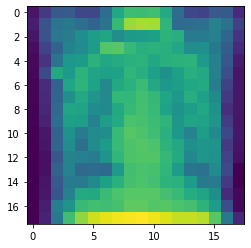

In [253]:
plt.imshow(img)
plt.savefig("layer_3max_normal.png",dpi=1200)